In [152]:
%matplotlib inline
import os
import sys
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

import matplotlib as mpl
mpl.rcParams['font.family'] = 'Arial'

from matplotlib.colors import LinearSegmentedColormap
import matplotlib.ticker as ticker
import matplotlib
import seaborn as sns

plt.style.use('ggplot')

data_path = os.path.join('C:\\','Data','pg_risk_analysis')
tc_path = os.path.join(data_path,'tc_netcdf')
fl_path = os.path.join(data_path,'GLOFRIS')
osm_data_path = os.path.join('C:\\','Data','country_osm')
pg_data_path = os.path.join(data_path,'pg_data')
vul_curve_path = os.path.join(data_path,'vulnerability_curves','input_vulnerability_data.xlsx')
output_path = os.path.join('C:\\','projects','pg_risk_analysis','output')
ne_path = os.path.join(data_path,'..',"natural_earth","ne_10m_admin_0_countries.shp")
figure_path = os.path.join('C:\\','projects','pg_risk_analysis','figures')

In [154]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import csv

output_path = os.path.join('C:\\','Users','mye500','Desktop','test_results')

In [12]:
risk_result = pd.read_csv(os.path.join(output_path,'fl_risk.csv'),index_col=[0])
risk_result
#sns.boxplot(x=risk_result["F5_1_1"])

,climate_model,risk_type,F5_1_1,F5_1_2,F5_1_3,F5_1_4,F5_1_5,F5_1_6,F5_1_7,F5_1_8,...,F1_1_3,F2_1_1,F2_1_2,F2_1_3,F3_1_1,F3_1_2,F4_1_1,F4_1_2,F4_1_3,F4_1_4
country_code,,,,,,,,,,,,,,,,,,,,,
NaN,NaN,NaN,line_risk,line_risk,line_risk,line_risk,line_risk,line_risk,line_risk,line_risk,...,plant_risk,substation_risk,substation_risk,substation_risk,tower_risk,tower_risk,pole_risk,pole_risk,pole_risk,pole_risk
BRN,historical,mean_risk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BRN,historical,lower_risk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BRN,historical,upper_risk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BRN,rcp8p5,mean_risk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VNM,historical,lower_risk,30840.60295,33924.66324,40092.78383,50270.18281,55297.25619,65351.21928,20663.20398,22729.46927,...,17014351.22,461.0689312,922.1378625,2305.344656,2486.683275,8111.247243,NaN,NaN,NaN,NaN
VNM,historical,upper_risk,51401.00491,56541.1054,66821.30639,83783.63801,92162.09365,108918.6988,34438.67329,37882.44878,...,28357252.03,768.4482187,1536.896437,3842.241094,4144.472125,13518.7454,NaN,NaN,NaN,NaN
VNM,rcp8p5,mean_risk,53724.39312,59096.83244,69841.71106,87570.76079,96327.93286,113841.957,35995.34339,39594.78174,...,26552093.13,1140.431433,2280.862866,5702.157166,4381.594825,14292.20975,NaN,NaN,NaN,NaN


# Read risk results

In [47]:
def read_excel(hazard_type):
    country_codes = ['BRN','CHN','IDN','JPN']
    infra_types = ['osm','gov']
    
    if hazard_type == 'tc':
        climate_models = ['historical','rcp8p5']
    elif hazard_type == 'fl':
        climate_models = ['historical','rcp8p5']
    
    for country_code in country_codes:
        for infra_type in infra_types:
            excel_path = os.path.join(output_path,'risk','{}_{}_{}_{}_risk.xlsx'.format(country_code,infra_type,hazard_type,climate_model))

            check_sheets = pd.ExcelFile(excel_path).sheet_names

            for sheet_name in check_sheets:
                excel = pd.read_excel(excel_path,sheet_name=sheet_name)
                print(excel)

                country_code = excel.columns[0].split('_')[0]
                infra_type = excel.columns[0].split('_')[1]
                

                risk_result[country_code] = excel.iloc[0].T

                risk_result[country_code]['country_code'] = pd.Series([country_code] * len(risk_result.columns))
                risk_result[country_code]['asset_type'] = pd.Series([sheet_name] * len(risk_result.columns))
                risk_result[country_code]['infra_type'] = pd.Series([infra_type] * len(risk_result.columns))

    return risk_result

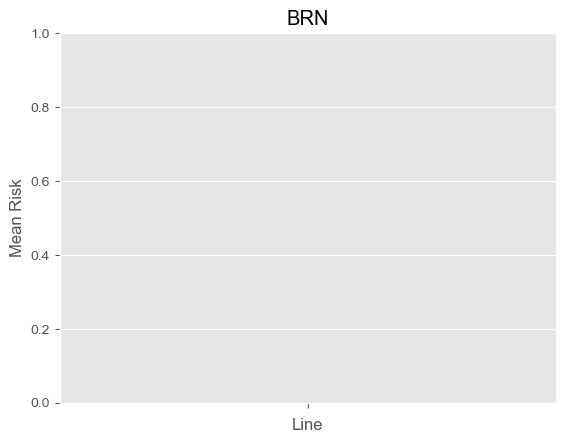

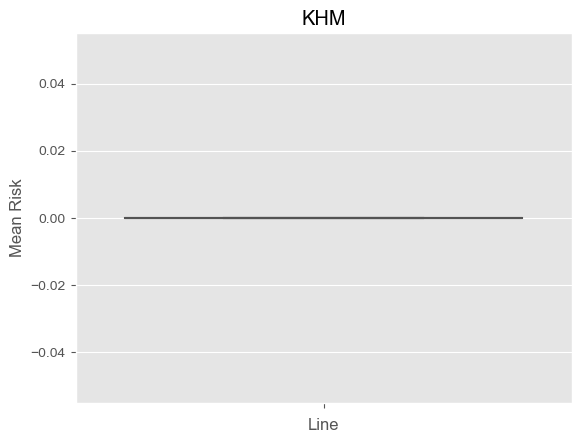

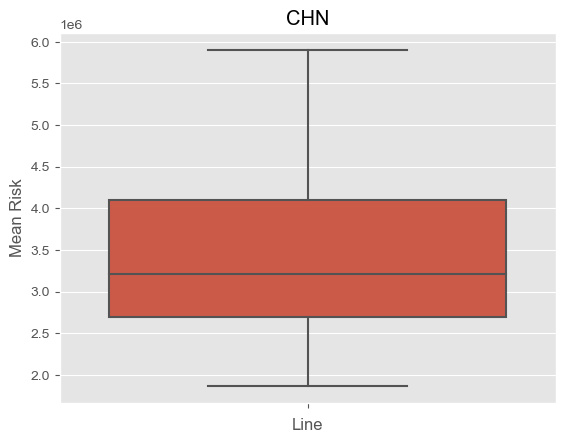

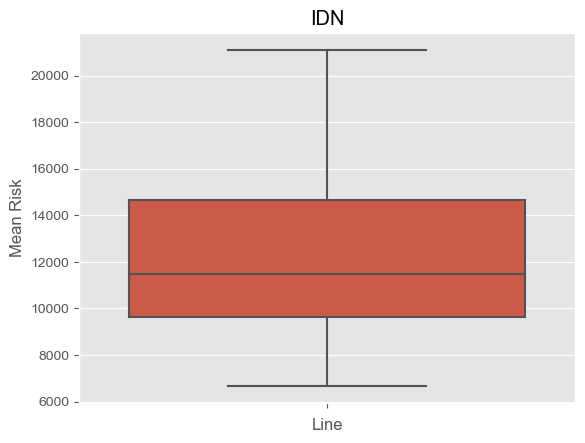

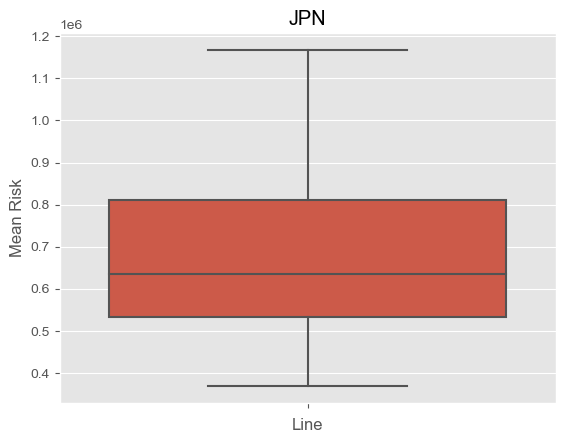

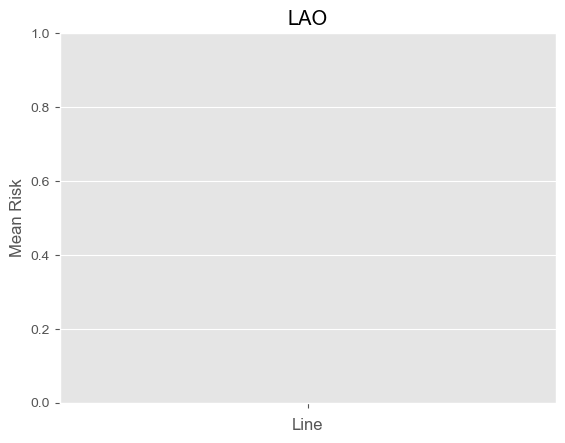

In [131]:
df_line = pd.read_csv(os.path.join(output_path,'fl_osm_risk.csv'),skiprows=1, usecols=range(15))

# 筛选满足条件的行
country_codes = ['BRN','KHM','CHN','IDN','JPN','LAO']

line_risk = {}

for country_code in country_codes:
    line_risk[country_code] = df_line[(df_line.iloc[:, 0] == country_code) & (df_line.iloc[:, 1] == 'historical') &
                                      (df_line.iloc[:, 2] == 'mean_risk')]

    # 打印筛选结果
    line_risk[country_code] = line_risk[country_code].T.iloc[3:]
    line_risk[country_code].columns = ["mean_risk"]
    
    sns.boxplot(data=line_risk[country_code], y="mean_risk")

    plt.title(country_code)
    plt.xlabel("Line")
    plt.ylabel("Mean Risk")

    # 显示图形
    plt.show()

<Axes: xlabel='country_code', ylabel='mean_risk'>

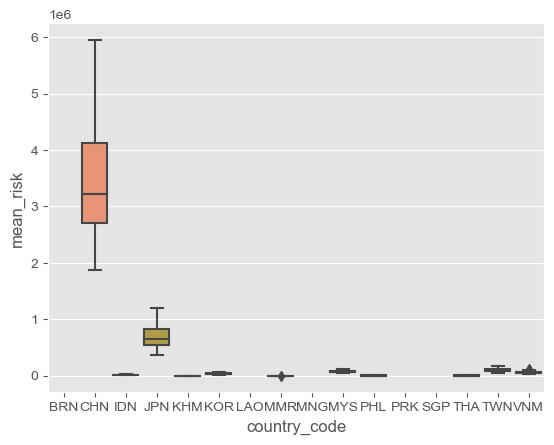

In [116]:
risk_result = pd.read_excel(os.path.join(output_path,'fl_risk_1.xlsx'))
line_risk = risk_result[risk_result['asset_type'] == 'line']
sns.boxplot(data=line_risk, x='country_code',y='mean_risk')

    asset_type country_code     mean_risk climate_model
0         line          BRN           NaN    historical
1         line          BRN           NaN    historical
2         line          BRN           NaN    historical
3         line          BRN           NaN    historical
4         line          BRN           NaN    historical
..         ...          ...           ...           ...
763      tower          VNM  14292.209748        rcp8p5
764       pole          VNM           NaN        rcp8p5
765       pole          VNM           NaN        rcp8p5
766       pole          VNM           NaN        rcp8p5
767       pole          VNM           NaN        rcp8p5

[768 rows x 4 columns]


<Axes: xlabel='asset_type', ylabel='mean_risk'>

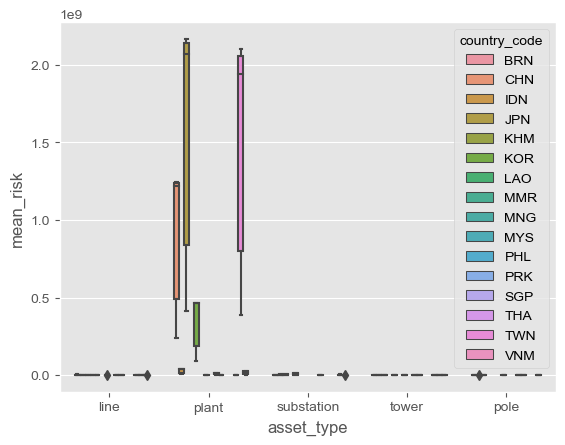

In [162]:
risk_result = pd.read_excel(os.path.join(output_path,'fl_risk_1.xlsx'))
sns.boxplot(data=risk_result, x="asset_type",y="mean_risk",hue='country_code')

<Axes: xlabel='country_code', ylabel='mean_risk'>

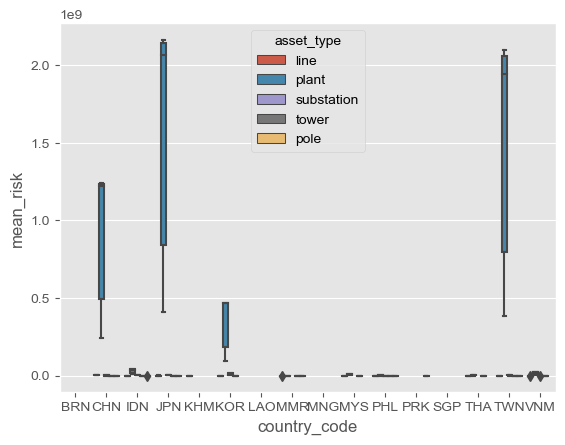

In [163]:
risk_result = pd.read_excel(os.path.join(output_path,'fl_risk_1.xlsx'))
sns.boxplot(data=risk_result, x='country_code',y='mean_risk',hue='asset_type')

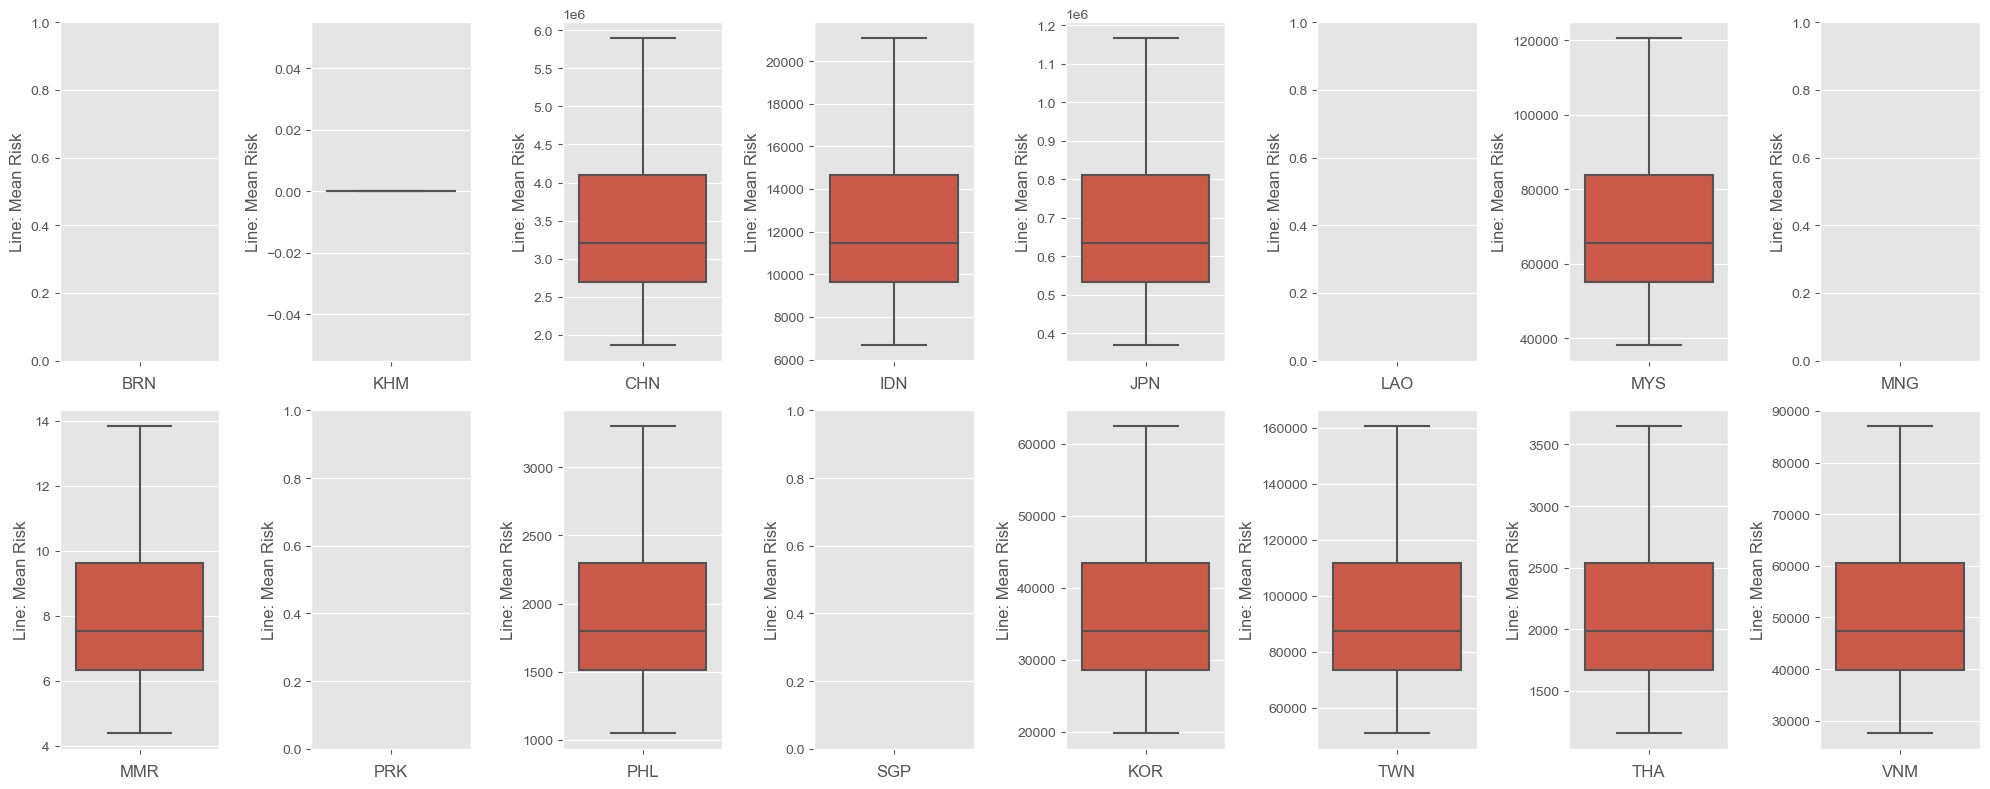

In [189]:
#Line
risk_result = pd.read_excel(os.path.join(output_path,'fl_risk_1.xlsx'))
line_risk_result = risk_result[(risk_result['asset_type'] == 'line') & (risk_result['climate_model'] == 'historical')]

country_codes = ['BRN','KHM','CHN','IDN','JPN','LAO','MYS','MNG','MMR','PRK','PHL','SGP','KOR','TWN','THA','VNM']

fig, ax = plt.subplots(2,8, figsize=(20,8))
ax = ax.flatten()

for i, country_code in enumerate(country_codes):
    line_risk_country = line_risk_result[line_risk_result['country_code'] == country_code]
    
    sns.boxplot(data=line_risk_country, y='mean_risk', ax=ax[i])
    ax[i].set_xlabel(country_code)
    ax[i].set_ylabel("Line: Mean Risk")
    
# 调整子图之间的间距
plt.tight_layout()

plt.savefig(os.path.join(output_path,'line_risk.jpg'))

# 显示图形
plt.show()

# fig_path = "figure_line.png"  # Set the file name for the saved figure
# fig.savefig(fig_path)  # Save the figure
# plt.close(fig)  # Close the figure to release memory

# figs.append(fig_path)
# print(fig_path)

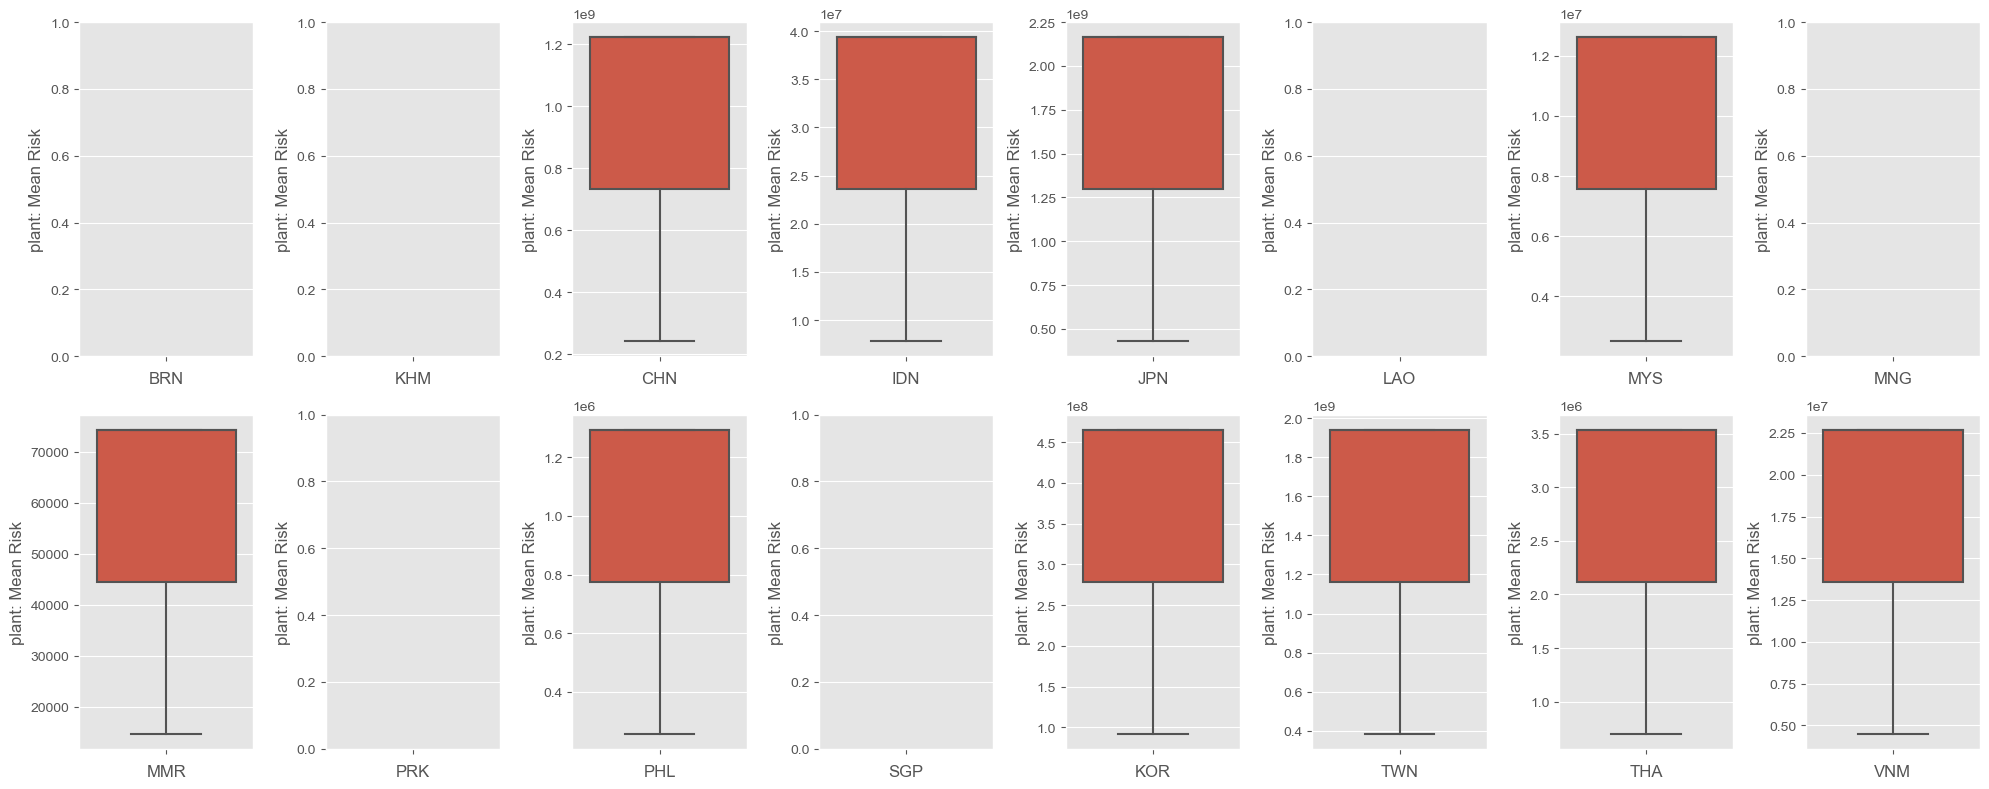

In [190]:
#Plant
risk_result = pd.read_excel(os.path.join(output_path,'fl_risk_1.xlsx'))
plant_risk_result = risk_result[(risk_result['asset_type'] == 'plant') & (risk_result['climate_model'] == 'historical')]

country_codes = ['BRN','KHM','CHN','IDN','JPN','LAO','MYS','MNG','MMR','PRK','PHL','SGP','KOR','TWN','THA','VNM']

fig, ax = plt.subplots(2,8, figsize=(20,8))
ax = ax.flatten()

for i, country_code in enumerate(country_codes):
    plant_risk_country = plant_risk_result[plant_risk_result['country_code'] == country_code]
    
    sns.boxplot(data=plant_risk_country, y='mean_risk', ax=ax[i])
    ax[i].set_xlabel(country_code)
    ax[i].set_ylabel("plant: Mean Risk")

# 调整子图之间的间距
plt.tight_layout()

plt.savefig(os.path.join(output_path,'plant_risk.jpg'))

# 显示图形
plt.show()

(2,)


ValueError: Cannot set a DataFrame with multiple columns to the single column line

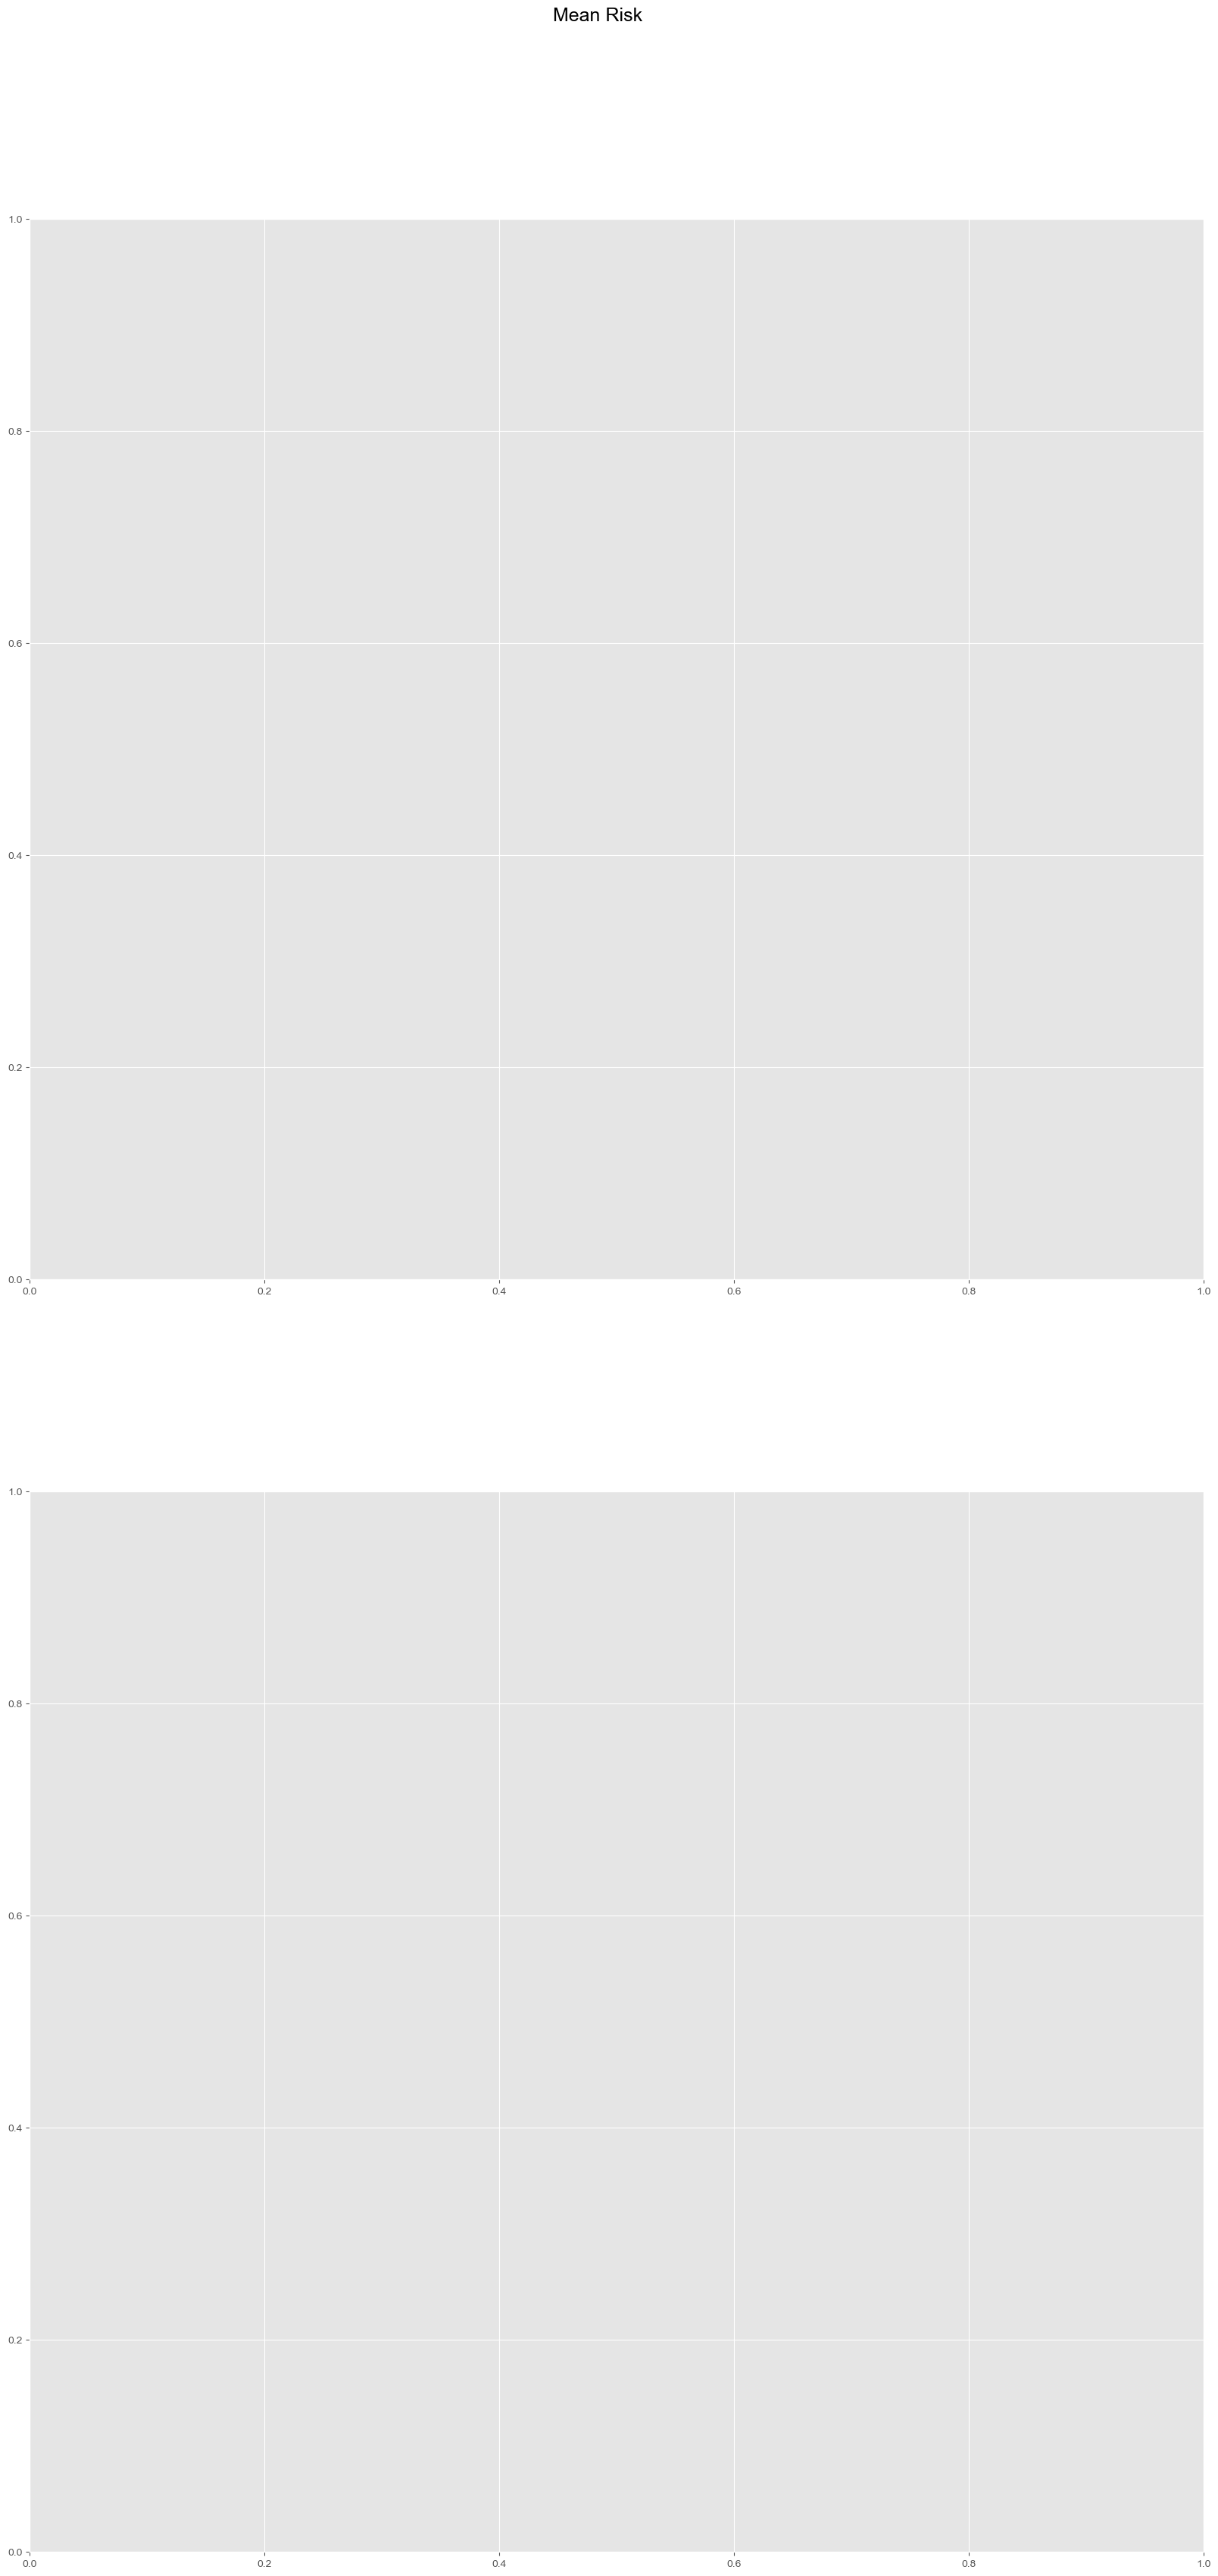

In [191]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sns

risk_result = pd.read_excel(os.path.join(output_path, 'fl_risk_1.xlsx'))
country_codes = ['BRN', 'KHM', 'CHN', 'IDN', 'JPN', 'LAO', 'MYS', 'MNG', 'MMR', 'PRK', 'PHL', 'SGP', 'KOR', 'TWN', 'THA', 'VNM']
asset_types = ['line','plant','substation','tower','pole']

# create subplots
fig, axs = plt.subplots(nrows=2, ncols=1,figsize=(20, 40))
print(axs.shape)
fig.suptitle("Mean Risk", fontsize=18, y=0.95)

for i,country_code in enumerate(country_codes):
    for asset_type in asset_types:
        risk_result[asset_type] = risk_result[(risk_result['asset_type'] == asset_type) & (risk_result['climate_model'] == 'historical')]
        fig, ax = plt.subplots(2, 8, figsize=(20, 8))
        ax = ax.flatten()

        risk_country[country] = risk_result[asset_type][risk_result[asset_type]['country_code'] == country_code]
        sns.boxplot(data=risk_country[country], y='mean_risk', ax=line_ax[i])
        ax[i].set_xlabel(country_code)
        ax[i].set_ylabel("{}: Mean Risk".format(asset_type))

fig.tight_layout()

# fig, (ax1, ax2) = plt.subplots(2)
# fig.suptitle('Vertically stacked subplots')
# ax1.plot(ax1)
# ax2.plot(ax2)